## Introduction

This notebook aims at providing a convenient toolbox to plot data analysis graphs for CIE A-Level Physics Paper 5 questions.


## Initialisation

You only need to massage this section for everything you need for your plot.

Here you are expected to provide the program with the dataset, which includes the $x$- and $y$-coordinates for the data points together with their uncertainties. Also, you should specify the size and the scales of the canvas on which the graph is plotted.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,12)

In [2]:
# define datasets
# if the values to be plotted have already been computed, use the following code to initialize
points = [
    # format: x_coordinate, y_coordiante, uncertainty
    (1.25, 4440, 100),
    (2.55, 5410, 150),
    (3.90, 6250, 200),
    (5.25, 7140, 260),
    (6.55, 8000, 320),
    (7.80, 8700, 380)
]

# define canvas size
x_lower, x_upper, x_sep = 1.0, 8.0, 1.0
y_lower, y_upper, y_sep = 4000, 9500, 500

canvas = (x_lower, x_upper, x_sep, y_lower, y_upper, y_sep)

In [3]:
# if the values to be plotted have not been calculated
# initialize with the raw data points
# the codes in the next few blocks can compute the values needed

raw_points = [
    # format: x_coordinate, y_coordiante, uncertainty
    (1.25, 225, 5),
    (2.55, 185, 5),
    (3.90, 160, 5),
    (5.25, 140, 5),
    (6.55, 125, 5),
    (7.80, 115, 5)
]

In [4]:
def extract_data_points(points):
    x = np.array([point[0] for point in points])
    y = np.array([point[1] for point in points])
    uncertainties = np.array([point[2] for point in points])
    return x, y, uncertainties

In [5]:
def convert(raw_points):
    raw_x, raw_y, raw_uncertainties = extract_data_points(raw_points)
    x = raw_x
    y = 1/ (raw_y * 1e-6)
    uncertainties = 1.0 * raw_uncertainties / raw_y * y
    
    return [(x[i], y[i], uncertainties[i]) for i in range(len(raw_points))]

In [6]:
# uncomment the following line if need to compute values to plot from raw data
# points = convert(raw_points)

## Best Fit & Worst Acceptable

Once these are done, the next couple of code blocks should be able to complete the folloing tasks automatically for you:

- plot the data points and the error bars

- plot a best fit line based on linear regression

- plot a worst acceptable line

- calculate the gradient of the best fit and its uncertainty

- calculate the $y$-intercept of the best fit and its uncertainty

In [7]:
def find_best_fit_coeffs(x, y):
    # determine best fit line for a set of 2D data points
    # coeffiencents are determined using linear regression
    x_mean = x.mean()
    y_mean = y.mean()
    
    Sxx = ((x - x_mean)**2).sum()
    Syy = ((y - y_mean)**2).sum()
    Sxy = ((x - x_mean) * (y - y_mean)).sum()

    best_fit_gradient = Sxy/Sxx
    best_fit_intercept = y_mean - best_fit_gradient * x_mean
    
    return best_fit_gradient, best_fit_intercept

In [8]:
def line_equation_by_points(A, B):
    # find gradient and intercept of the line connecting two fixed points A and B
    # A, B are 2-tuples containing the x- and y-coordinates of the two points
    gradient = (B[1]- A[1])/(B[0] - A[0])
    intercept = A[1] - gradient * A[0]
    return gradient, intercept

In [9]:
def find_worst_acceptable_coeffs(x, y, uncertainties):
    ## determine the coefficients of the worst acceptable line
    
    # set initial worst acceptable line
    left_index = 0
    right_index = len(x)-1
    left_end_point = (x[left_index], y[left_index]-uncertainties[left_index])
    right_end_point = (x[right_index], y[right_index]+uncertainties[right_index])
    worst_fit_gradient, worst_fit_intercept = line_equation_by_points(left_end_point, right_end_point)
    
    # check that worst acceptable does not go below any error bar
    for i in range(1, len(x)-1):
        current_x, current_y, current_uncertainty = x[i], y[i], uncertainties[i]
        current_y_on_line = worst_fit_gradient * current_x + worst_fit_intercept
        if current_y_on_line < current_y - current_uncertainty:
            left_index = i
            left_end_point = (current_x, current_y - current_uncertainty)
            worst_fit_gradient, worst_fit_intercept = line_equation_by_points(left_end_point, right_end_point)
    
    # check that worst acceptable does not go above any error bar
    for i in range(len(points)-2, left_index+1, -1):
        current_x, current_y, current_uncertainty = points[i]
        current_y_on_line = worst_fit_gradient * current_x + worst_fit_intercept
        if current_y_on_line > current_y + current_uncertainty:
            right_index = i
            right_end_point = (current_x, current_y + current_uncertainty)
            worst_fit_gradient, worst_fit_intercept = line_equation_by_points(left_end_point, right_end_point)

    return worst_fit_gradient, worst_fit_intercept

In [10]:
def points_on_line(gradient, intercept, x_lower, x_upper):
    x_coords = np.linspace(x_lower, x_upper, 5)
    y_coords = gradient * x_coords + intercept
    return x_coords, y_coords

## Ready to Roll!

In [11]:
def plot_lines(points, canvas):
    # extracting and packing parameters
    x, y, uncertainties = extract_data_points(points)
    x_lower, x_upper, x_sep, y_lower, y_upper, y_sep = canvas

    # calculate coefficients for best fit and worst acceptable
    best_fit_gradient, best_fit_intercept = find_best_fit_coeffs(x, y)
    worst_fit_gradient, worst_fit_intercept = find_worst_acceptable_coeffs(x, y, uncertainties)
    
    # compute points on best fit and worst acceptable to plot
    best_fit_x, best_fit_y = points_on_line(best_fit_gradient, best_fit_intercept, x_lower, x_upper)
    worst_fit_x, worst_fit_y = points_on_line(worst_fit_gradient, worst_fit_intercept, x_lower, x_upper)

    # plot everything needed for the exam question
    plt.errorbar(x, y, xerr=None, yerr=uncertainties, fmt='x', color='black')
    plt.plot(best_fit_x, best_fit_y, label="best fit", color='blue')
    plt.plot(worst_fit_x, worst_fit_y, label="worst acceptable", color='green')
    
    # set graph labels and scales
    plt.xlabel(r"$x$")
    plt.xlabel(r"$y$")
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)
    plt.legend()
    plt.xticks(np.arange(x_lower, x_upper, x_sep))
    plt.yticks(np.arange(y_lower, y_upper, y_sep))
    plt.grid(linestyle = '--')
    
    # display the final plot
    plt.show()
    
    # print out results of gradient and y-intercept
    print(f"gradient of best fit    = {best_fit_gradient}")
    print(f"uncertainty in gradient = {abs(best_fit_gradient - worst_fit_gradient)}")
    print("")
    print(f"y-intercept of best fit    = {best_fit_intercept}")
    print(f"uncertainty in y-intercept = {abs(best_fit_intercept - worst_fit_intercept)}")    

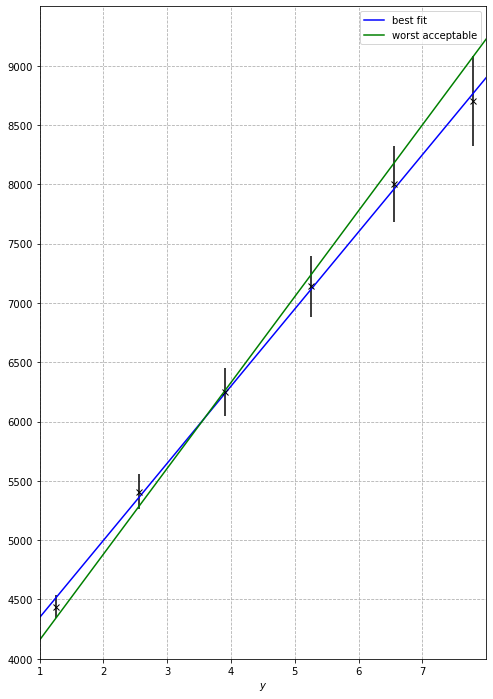

gradient of best fit    = 650.0411658159065
uncertainty in gradient = 73.62295632149801

y-intercept of best fit    = 3698.9793622042926
uncertainty in y-intercept = 263.5595148760485


In [12]:
# main program
plot_lines(points, canvas)